### Import libraries

In [1]:
from os import getcwd
from os.path import join, abspath, pardir, relpath, exists

import pandas as pd
import numpy as np
from numpy import matrixlib as npmat
import networkx as nx
from typing import Union

from IPython.display import IFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.DataFrame(
    [
        [["a", "b", "c", "d"], 5],
        [["a", "c", "b", "d"], 4],
        [["d", "b", "a", "c"], 2],
        [["d", "b", "c", "a"], 6],
        [["c", "b", "a", "d"], 8],
        [["d", "c", "b", "a"], 2],
    ], columns=["order", "score"]
)
df.head()

,order,score
0,"[a, b, c, d]",5
1,"[a, c, b, d]",4
2,"[d, b, a, c]",2
3,"[d, b, c, a]",6
4,"[c, b, a, d]",8


### Helper methods

In [4]:
# ------------------------ #
# Helper logging functions
# ------------------------ #
def print_log(text: str) -> None:
    """ Prints the log """
    print(f"[ log ]: {text}")

def print_error(text: str) -> None:
    """ Prints the error """
    print(f"[ error ]: {text}")
# ------------------------ #
# Helper functions
# ------------------------ #
def df_with_choice_column(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns a dataframe with columns for each choice

    Parameters
    ----------
    df : pd.DataFrame
        The dataframe with the choices

    Returns
    -------
    pd.DataFrame
        The dataframe with the choices as columns
    
    Example
    -------
    >>> df = pd.DataFrame(
    ...     [
    ...         [["a", "b", "c", "d"], 5],
    ...         [["a", "c", "b", "d"], 4],
    ...         [["d", "b", "a", "c"], 2],
    ...         [["d", "b", "c", "a"], 6],
    ...         [["c", "b", "a", "d"], 8],
    ...         [["d", "c", "b", "a"], 2],
    ...     ], columns=["order", "score"]
    ... )
    >>> df_with_choice_column(df)
    >>> 	choice_1	choice_2	choice_3	choice_4    score
        0      a	        b	       c            d         5
        1      a	        c	       b            d         4
        2      d	        b	       a            c         2
        3      d	        b	       c            a         6
        4      c	        b	       a            d         8
        5      d	        c	       b            a         2
    """
    ndf = pd.DataFrame(df['order'].to_list()).rename(lambda x: x + 1, axis=1).add_prefix('choice_')
    ndf['score'] = df['score']
    return ndf

### Read from `.csv` file

In [3]:
# parent_dir = abspath(join(join(getcwd(), pardir), pardir))
# data_dir = join(parent_dir, 'data')
# data_file = join(data_dir, "data.csv")
# # docs_dir = join(parent_dir, 'docs')
# # if exists(docs_dir):
# #     doc_file = relpath(join(docs_dir, 'practical_works_binary_relations.pdf'))
#     # IFrame(doc_file, width=1000, height=250)
# matrix = csv_to_matrix(data_file)

#### 1. Compute a function `MajorityRule` returning the result of a simple majority rule voting, between two candidates.

In [8]:
def MajorityRule(df: pd.DataFrame) -> Union[str, None]:
    """ Majority rule """
    # Get the max score
    max_score = df["score"].max()
    # Get the rows with the max score
    max_rows = df[df["score"] == max_score]
    # Get the number of rows
    num_rows = max_rows.shape[0]
    # If there is more than one row, then there is a tie
    if num_rows > 1:
        print_error("There is a tie")
        return None
    # Get the order
    order = max_rows["order"].values[0]
    # Return the order
    return order[0] if len(order) else order

In [10]:
winner = MajorityRule(df=df)
print_log(f"Winner by 'MajorityRule' is '{winner}'")

[ log ]: Winner by 'MajorityRule' is 'c'


#### 2. Compute a function `Plurality` returning the result of a plurality voting.

In [11]:
def Plurality(df: pd.DataFrame) -> Union[str, None]:
    """ Plurality """
    # Get the max score
    max_score = df["score"].max()
    # Get the rows with the max score
    max_rows = df[df["score"] == max_score]
    # Get the number of rows
    num_rows = max_rows.shape[0]
    # If there is more than one row, then there is a tie
    if num_rows > 1:
        print_error("There is a tie")
        return None
    # Get the order
    order = max_rows["order"].values[0]
    # Return the order
    return order[0] if len(order) else order

In [15]:
winner = Plurality(df=df)
print_log(f"Winner by 'Plurality' is '{winner}'")

[ log ]: Winner by 'Plurality' is 'c'


#### 3. Compute a function `PluralityRunoff` returning the result of a plurality Runoff voting (plurality with two rounds).

In [ ]:
def PluralityRunoff(df: pd.DataFrame) -> Union[str, None]:
    """ Plurality Runoff """
    # if only one row, then return the winner
    if df.shape[0] == 1:
        print_log("There is only one row")
        return df["order"].values[0][0]
    # Get the sum of the scores
    sum_scores = df["score"].sum()
    # Get df with the choices
    cdf = df_with_choice_column(df)
    # Only consider the first choice across all rows
    best_choice_1 = cdf.groupby(["choice_1"], as_index=False)["score"].sum().sort_values("score", ascending=False)
    # Get the max score
    max_score = best_choice_1.head(1).score.values[0]

    # 1st round: If the max score is more than half of the sum of the scores, then return the winner
    if max_score > (sum_scores / 2):
        print_log("Winner has more than 50% of the votes")
        return MajorityRule(df=df)

    # 2nd round: If the max score is less than half of the sum of the scores
    best_two = cdf.groupby(["choice_1", "choice_2"], as_index=False)["score"].sum().sort_values("score", ascending=False)
    

    # Get the rows with the max score
    max_rows = df[df["score"] == max_score]
    # Get the number of rows
    num_rows = max_rows.shape[0]
    # If there is more than one row, then there is a tie
    if num_rows > 1:
        print_error("There is a tie")
        return None
    # Get the order
    order = max_rows["order"].values[0]
    # Return the order
    return order[0] if len(order) else order

In [38]:
cdf = df_with_choice_column(df)
cdf

,choice_1,choice_2,choice_3,choice_4,score
0,a,b,c,d,5
1,a,c,b,d,4
2,d,b,a,c,2
3,d,b,c,a,6
4,c,b,a,d,8
5,d,c,b,a,2


In [53]:
cdf.groupby(["choice_1"], as_index=False)["score"].sum().sort_values("score", ascending=False).head(2).choice_1.values.tolist()

['d', 'a']

In [54]:
from itertools import combinations

In [56]:
list(combinations(['a', 'b'], 2))

[('a', 'b')]

In [44]:
cdf.groupby(["choice_1", "choice_2"], as_index=False)["score"].sum().sort_values("score", ascending=False)

,choice_1,choice_2,score
2,c,b,8
3,d,b,8
0,a,b,5
1,a,c,4
4,d,c,2


In [25]:
df.sort_values(by="score", ascending=False).head(2).values

array([[list(['c', 'b', 'a', 'd']), 8],
       [list(['d', 'b', 'c', 'a']), 6]], dtype=object)

In [ ]:
winner = PluralityRunoff(df=df)
print_log(f"Winner by 'PluralityRunoff' is '{winner}'")

In [5]:
def plot_graph(graph: Union[npmat.matrix, nx.Graph], **kwargs: dict) -> None:
    """
    Plots a given graph/matrix

    Parameters
    ----------
    matrix: npmat.matrix or nx.Graph
        A numpy matrix or a network graph
    """
    if isinstance(graph, npmat.matrix):
        n_row, n_col = graph.shape
        if n_row != n_col:
            print_error(f"Adjacency matrix not square: nx,ny=({n_row}, {n_col}) [NetworkXError]")
            return
        graph = matrix_to_graph(graph)
    nx.draw(graph, with_labels=True, **kwargs)

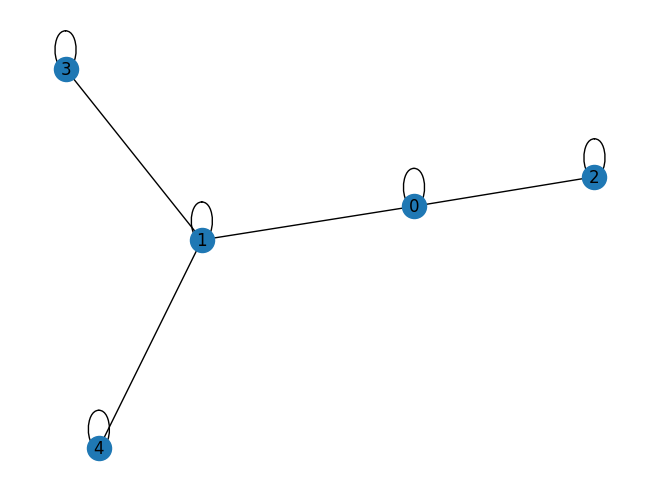

In [6]:
plot_graph(matrix)

### Exercise 2 - Build a Python function `CompleteCheck` testing if a binary relation is _complete_.

In [7]:
def CompleteCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is complete
    """
    matrix = graph_to_matrix(graph)
    n_row, n_col = matrix.shape
    for i in range(n_row):
        for j in range(n_col):
            if matrix[i, j] == 0 or matrix[i, j] == 0:
                return False
    return True

In [8]:
CompleteCheck(matrix)

False

### Exercise 3 - Build a Python function `ReflexiveCheck` testing if a binary relation is _reflexive_.

In [9]:
def ReflexiveCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is reflexive
    """
    matrix = graph_to_matrix(graph)
    return np.all(np.diagonal(matrix) == 1)

In [10]:
ReflexiveCheck(matrix)

True

### Exercise 4 - Build a Python function `AsymmetricCheck` testing if a binary relation is _asymmetric_.

In [11]:
def AntisymmetricCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is antisymmetric
    """
    matrix = graph_to_matrix(graph)
    n_row, n_col = matrix.shape
    for i in range(n_row):
        for j in range(n_col):
            if matrix[i, j] == 1 and matrix[j, i] == 1 and i != j:
                return False
    return True

In [12]:
AntisymmetricCheck(matrix)

True

### Exercise 5 - Build a Python function `SymmetricCheck` testing if a binary relation is _symmetric_.

In [13]:
def SymmetricCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is symmetric
    """
    matrix = graph_to_matrix(graph)
    return np.all(matrix == matrix.T)

In [14]:
SymmetricCheck(matrix)

False

### Exercise 6 - Build a Python function `AntisymmetricCheck` testing if a binary relation is _antisymmetric_.

In [15]:
def AntisymmetricCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is antisymmetric
    """
    matrix = graph_to_matrix(graph)
    matrix_sum = matrix + matrix.T
    check = matrix_sum - np.diag(np.diagonal(matrix_sum))
    return (np.logical_not(np.any(check == 2))).all()

In [16]:
AntisymmetricCheck(matrix)

True

### Exercise 7 - Build a Python function `TransitiveCheck` testing if a binary relation is _transitive_.

In [17]:
def TransitiveCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is transitive
    """
    matrix = graph_to_matrix(graph)
    return np.all(np.linalg.matrix_power(matrix, 3) == matrix)

In [18]:
TransitiveCheck(matrix)

False

### Exercise 8 - Build a Python function `NegativetransitiveCheck` testing if a binary relation is _negativetransitive_.

In [19]:
def NegativetrasiitiveCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is negative transitive
    """
    matrix = graph_to_matrix(graph)
    return np.all(np.linalg.matrix_power(matrix, 3) == 0)

In [20]:
NegativetrasiitiveCheck(matrix)

False

### Exercise 9 - Build a Python function `CompleteOrderCheck` testing if a binary relation is a _complete order_.

In [21]:
def CompleteOrderCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is a complete order
    """
    return CompleteCheck(graph) and AntisymmetricCheck(graph) and TransitiveCheck(graph)

In [22]:
CompleteOrderCheck(matrix)

False

### Exercise 10 - Build a Python function `CompletePreOrderCheck` testing if a binary relation is a _complete pre-order_.

In [23]:
def CompletePreOrderCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is a complete preorder
    """
    return CompleteCheck(graph) and TransitiveCheck(graph)

In [24]:
CompletePreOrderCheck(matrix)

False

### Exercise 11 - Build a Python function `StrictRelation` returning the _strict relation_ part of a binary relation.

In [25]:
def StrictRelation(graph: Union[nx.Graph, npmat.matrix]) -> npmat.matrix:
    """
    Returns a strict relation of a given graph/matrix
    """
    matrix = graph_to_matrix(graph)
    output = matrix.copy()

    for i in range(0,len(matrix)):
        for j in range(0,len(matrix)):
            if matrix[i, j] == 1 and matrix[j, i] == 1:
                output[i, j], output[j, i] = 0, 0
    return npmat.asmatrix(output)

In [26]:
StrictRelation(matrix)

matrix([[0, 1, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

### Exercise 12 - Build a Python function `IndifferenceRelation` returning the _indifference relation_ part of a binary relation.

In [27]:
def IndifferenceRelation(graph: Union[nx.Graph, npmat.matrix]) -> npmat.matrix:
    """
    Returns an indifference relation of a given graph/matrix
    """
    matrix = graph_to_matrix(graph)
    output = np.zeros(matrix.shape)
    for i in range(0,len(matrix)):
        for j in range(0,len(matrix)):
            if matrix[i, j] == 1 and matrix[j, i] == 1:
                output[i, j], output[j, i] = 1, 1
    return npmat.asmatrix(output)

In [28]:
IndifferenceRelation(matrix)

matrix([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

### Exercise 13 - Build a Python function `Topologicalsorting` returning a _topological sorting_ of a binary relation.

In [29]:
def Topologicalsorting(graph: Union[nx.Graph, npmat.matrix]) -> list:
    """
    Returns a topological sort of a given graph/matrix
    """
    
    def dagCheck(matrix: npmat.matrix) -> bool:
        matrix -= np.diag(np.diagonal(matrix))
        matrix_reachable, matrix_reachable_sum = np.identity(len(matrix)), np.zeros(matrix.shape)
        for i in range(0, len(matrix)):
            matrix_reachable = matrix_reachable.dot(matrix)
            matrix_reachable_sum += matrix_reachable
        return np.all(np.diagonal(matrix_reachable_sum.dot(matrix_reachable_sum)) == 0)
    
    matrix = graph_to_matrix(graph)

    if not dagCheck(matrix):
        print_error("Graph is not a DAG")
        return
    
    topologicalSorting_matrix = matrix - np.diag(np.diagonal(matrix))
    topologicalSorting_list, original_list = [], list(range(0,len(matrix)))
    while len(original_list) != 0:
        sum = topologicalSorting_matrix.sum(axis=1)
        for i in original_list:
            if sum[i] == 0:
                topologicalSorting_list.append(i)
                topologicalSorting_matrix[:,i] = 0
                original_list.remove(i)
    return topologicalSorting_list

In [30]:
Topologicalsorting(matrix)

[2, 3, 1, 0, 4]